## Standardized Test Score File Processing

In [1]:
# importing packages

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# loading both csvs
mcas = pd.read_csv('sample-mcas.csv')
mcasProcessed = pd.read_csv('sample-mcas-processed.csv')

In [3]:
print(mcas.shape)
mcas.head()

(2671, 238)


,district,school,schtype,adminyear,bookletnumber,sasid,grade,stugrade,lastname,firstname,...,mscaleds2010,mscaleds2011,mscaleds2012,esgp2010,esgp2011,esgp2012,msgp2010,msgp2011,msgp2012,summarize
0,DistrictX,5,ES,2013,682515750,1408905,3,3,Smith,John,...,,,,,,,,,,1
1,DistrictX,5,ES,2013,424062353,1020285,3,3,Smith,John,...,,,,,,,,,,1
2,DistrictX,5,ES,2013,582975335,1681155,3,3,Smith,John,...,,,,,,,,,,1
3,DistrictX,5,ES,2013,408171609,1987801,3,3,Smith,John,...,,,,,,,,,,1
4,DistrictX,5,ES,2013,708941361,1351732,3,3,Smith,John,...,,,,,,,,,,1


In [4]:
mcas.info(max_cols = 238)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 238 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   district       2671 non-null   object
 1   school         2671 non-null   int64 
 2   schtype        2671 non-null   object
 3   adminyear      2671 non-null   int64 
 4   bookletnumber  2671 non-null   int64 
 5   sasid          2671 non-null   int64 
 6   grade          2671 non-null   int64 
 7   stugrade       2671 non-null   object
 8   lastname       2671 non-null   object
 9   firstname      2671 non-null   object
 10  mi             2671 non-null   object
 11  gender         2671 non-null   object
 12  race_off       2671 non-null   object
 13  dob            2671 non-null   object
 14  yrsinmass      2671 non-null   object
 15  yrsinmass_num  2671 non-null   int64 
 16  yrsinsch       2671 non-null   object
 17  yrsindis       2671 non-null   object
 18  ever_ell       2671 non-nul

In [5]:
mcas.describe()

,school,adminyear,bookletnumber,sasid,grade,yrsinmass_num,ever_ell,highneeds,freelunch_off,title1_off,lep_off,lepflep_off,flep_off,sped_off,plan504_off,firstlanguage,spedplacement,octenr,datachanged,summarize
count,2671.000000,2671.0,2.671000e+03,2.671000e+03,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,271.608012,2013.0,5.998816e+08,1.493533e+06,6.178210,6.292400,0.276675,0.578061,0.460876,0.059154,0.081617,0.153875,0.073381,0.228753,0.056533,206.669787,5.786597,0.958817,0.001872,0.965182
std,205.471203,0.0,1.153302e+08,2.917644e+05,2.263468,2.633168,0.447438,0.493961,0.498560,0.235957,0.273832,0.360896,0.260809,0.420109,0.230992,141.996757,11.997165,0.198751,0.043234,0.183354
min,2.000000,2013.0,4.005219e+08,1.000077e+06,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,2013.0,5.013052e+08,1.237988e+06,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000
50%,404.000000,2013.0,5.965812e+08,1.494028e+06,6.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,267.000000,0.000000,1.000000,0.000000,1.000000
75%,415.000000,2013.0,7.005748e+08,1.752004e+06,8.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,267.000000,1.000000,1.000000,0.000000,1.000000
max,890.000000,2013.0,7.999597e+08,1.999981e+06,10.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,888.000000,60.000000,1.000000,1.000000,1.000000


In [6]:
mcas.nunique()

district           22
school             29
schtype             4
adminyear           1
bookletnumber    2671
                 ... 
esgp2012          100
msgp2010          100
msgp2011          100
msgp2012          100
summarize           2
Length: 238, dtype: int64

In [7]:
mcasProcessed.head()

,NCESID,StudentTestID,StudentLocalID,StudentGradeLevel,TestDate,TestName,TestTypeName,TestSubjectName,TestGradeLevel,Score1Label,...,Score1Value,Score2Label,Score2Type,Score2Value,Score3Label,Score3Type,Score3Value,Score4Label,Score4Type,Score4Value
0,373737,4342342,765765,7,4/5/13,MCAS,MCAS Math,Math,7,Performance Level,...,3 - NI,Scaled Score,Scale,233,CPI,Scale,87,NaN,NaN,NaN
1,373737,4342342,765765,7,4/5/13,MCAS,MCAS ELA,ELA,7,Performance Level,...,4 - P,Scaled Score,Scale,347,CPI,Scale,92,NaN,NaN,NaN


In [8]:
mcasProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NCESID             2 non-null      int64  
 1   StudentTestID      2 non-null      int64  
 2   StudentLocalID     2 non-null      int64  
 3   StudentGradeLevel  2 non-null      int64  
 4   TestDate           2 non-null      object 
 5   TestName           2 non-null      object 
 6   TestTypeName       2 non-null      object 
 7   TestSubjectName    2 non-null      object 
 8   TestGradeLevel     2 non-null      int64  
 9   Score1Label        2 non-null      object 
 10  Score1Type         2 non-null      object 
 11  Score1Value        2 non-null      object 
 12  Score2Label        2 non-null      object 
 13  Score2Type         2 non-null      object 
 14  Score2Value        2 non-null      int64  
 15  Score3Label        2 non-null      object 
 16  Score3Type         2 non-null 

In [9]:
mcasProcessed.describe()

,NCESID,StudentTestID,StudentLocalID,StudentGradeLevel,TestGradeLevel,Score2Value,Score3Value,Score4Label,Score4Type,Score4Value
count,2.0,2.0,2.0,2.0,2.0,2.000000,2.000000,0.0,0.0,0.0
mean,373737.0,4342342.0,765765.0,7.0,7.0,290.000000,89.500000,NaN,NaN,NaN
std,0.0,0.0,0.0,0.0,0.0,80.610173,3.535534,NaN,NaN,NaN
min,373737.0,4342342.0,765765.0,7.0,7.0,233.000000,87.000000,NaN,NaN,NaN
25%,373737.0,4342342.0,765765.0,7.0,7.0,261.500000,88.250000,NaN,NaN,NaN
50%,373737.0,4342342.0,765765.0,7.0,7.0,290.000000,89.500000,NaN,NaN,NaN
75%,373737.0,4342342.0,765765.0,7.0,7.0,318.500000,90.750000,NaN,NaN,NaN
max,373737.0,4342342.0,765765.0,7.0,7.0,347.000000,92.000000,NaN,NaN,NaN


In [10]:
mcasProcessed.nunique()

NCESID               1
StudentTestID        1
StudentLocalID       1
StudentGradeLevel    1
TestDate             1
TestName             1
TestTypeName         2
TestSubjectName      2
TestGradeLevel       1
Score1Label          1
Score1Type           1
Score1Value          2
Score2Label          1
Score2Type           1
Score2Value          2
Score3Label          1
Score3Type           1
Score3Value          2
Score4Label          0
Score4Type           0
Score4Value          0
dtype: int64

Now I can start working on showing the `mcas` dataset cleaned up to specifications. Once I do that, I can  If need be, I can give the cleaned data set one more quick programatic assessment and cleaning if needed.

In [11]:
# creating a new df for sample-mcas.csv
mcas_clean = mcas.copy()
print(mcas_clean.shape)
mcas_clean.head(5)

(2671, 238)


,district,school,schtype,adminyear,bookletnumber,sasid,grade,stugrade,lastname,firstname,...,mscaleds2010,mscaleds2011,mscaleds2012,esgp2010,esgp2011,esgp2012,msgp2010,msgp2011,msgp2012,summarize
0,DistrictX,5,ES,2013,682515750,1408905,3,3,Smith,John,...,,,,,,,,,,1
1,DistrictX,5,ES,2013,424062353,1020285,3,3,Smith,John,...,,,,,,,,,,1
2,DistrictX,5,ES,2013,582975335,1681155,3,3,Smith,John,...,,,,,,,,,,1
3,DistrictX,5,ES,2013,408171609,1987801,3,3,Smith,John,...,,,,,,,,,,1
4,DistrictX,5,ES,2013,708941361,1351732,3,3,Smith,John,...,,,,,,,,,,1


In [12]:
mcas_clean.info(max_cols = 238)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 238 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   district       2671 non-null   object
 1   school         2671 non-null   int64 
 2   schtype        2671 non-null   object
 3   adminyear      2671 non-null   int64 
 4   bookletnumber  2671 non-null   int64 
 5   sasid          2671 non-null   int64 
 6   grade          2671 non-null   int64 
 7   stugrade       2671 non-null   object
 8   lastname       2671 non-null   object
 9   firstname      2671 non-null   object
 10  mi             2671 non-null   object
 11  gender         2671 non-null   object
 12  race_off       2671 non-null   object
 13  dob            2671 non-null   object
 14  yrsinmass      2671 non-null   object
 15  yrsinmass_num  2671 non-null   int64 
 16  yrsinsch       2671 non-null   object
 17  yrsindis       2671 non-null   object
 18  ever_ell       2671 non-nul

In [13]:
# dropping unnecessary columns
mcas_clean = mcas_clean.drop(['district', 'school', 'schtype', 'adminyear',
                              'bookletnumber', 'grade', 'lastname', 'firstname',
                              'mi', 'gender', 'race_off', 'dob',
                              'yrsinmass', 'yrsinmass_num', 'yrsinsch', 'yrsindis',
                              'ever_ell', 'highneeds', 'freelunch_off', 'title1_off',
                              'lep_off', 'lepflep_off', 'flep_off', 'sped_off',
                              'plan504_off', 'firstlanguage', 'natureofdis', 'levelofneed',
                              'spedplacement', 'nclb_choice', 'octenr', 'conenr_sch',
                              'conenr_dis', 'access_part', 'ealt', 'conenr_sta',
                              'ecomplexity', 'eteststat', 'wptopdev', 'wpcompconv',
                              'eitem1', 'eitem2', 'eitem3', 'eitem4',
                              'eitem5', 'eitem6', 'eitem7', 'eitem8',
                              'eitem9', 'eitem10', 'eitem11', 'eitem12',
                              'eitem13', 'eitem14', 'eitem15', 'eitem16',
                              'eitem17', 'eitem18', 'eitem19', 'eitem20',
                              'eitem21', 'eitem22', 'eitem23', 'eitem24',
                              'eitem25', 'eitem26', 'eitem27', 'eitem28',
                              'eitem29', 'eitem30', 'eitem31', 'eitem32',
                              'eitem33', 'eitem34', 'eitem35', 'eitem36',
                              'eitem37', 'eitem38', 'eitem39', 'eitem40',
                              'eitem41', 'eitem42', 'erawsc', 'emcpts', 'eorpts',  
                              'eperflev', 'enumin', 'eassess', 'esgp', 'amendela',
                              'malt', 'mcomplexity', 'mteststat', 'mrawsc',
                              'mitem1', 'mitem2', 'mitem3', 'mitem4',
                              'mitem5', 'mitem6', 'mitem7', 'mitem8',
                              'mitem9', 'mitem10', 'mitem11', 'mitem12',
                              'mitem13', 'mitem14', 'mitem15', 'mitem16',
                              'mitem17', 'mitem18', 'mitem19', 'mitem20',
                              'mitem21', 'mitem22', 'mitem23', 'mitem24',
                              'mitem25', 'mitem26', 'mitem27', 'mitem28',
                              'mitem29', 'mitem30', 'mitem31', 'mitem32',
                              'mitem33', 'mitem34', 'mitem35', 'mitem36',
                              'mitem37', 'mitem38', 'mitem39', 'mitem40', 
                              'mitem41', 'mitem42', 'mmcpts', 'morpts',
                              'mperflev',  'mnumin', 'massess', 'msgp', 'amendmat',
                              'salt', 'scomplexity', 'steststat', 'scitry', 'srawsc',
                              'sitem1', 'sitem2', 'sitem3', 'sitem4',
                              'sitem5', 'sitem6', 'sitem7', 'sitem8',
                              'sitem9', 'sitem10', 'sitem11', 'sitem12',
                              'sitem13', 'sitem14', 'sitem15', 'sitem16',
                              'sitem17', 'sitem18', 'sitem19', 'sitem20',
                              'sitem21', 'sitem22', 'sitem23', 'sitem24',
                              'sitem25', 'sitem26', 'sitem27', 'sitem28',
                              'sitem29', 'sitem30', 'sitem31', 'sitem32',
                              'sitem33', 'sitem34', 'sitem35', 'sitem36',
                              'sitem37', 'sitem38', 'sitem39', 'sitem40', 
                              'sitem41', 'sitem42', 'sitem43', 'sitem44',
                              'sitem45', 'smcpts', 'sorpts', 'sperflev',
                              'snumin', 'sassess', 'amendsci', 'ela_cd',
                              'math_cd', 'sci_cd', 'accom_l', 'accom_c',
                              'accom_m', 'accom_s', 'accom26l', 'accom29c',
                              'accom30m', 'datachanged', 'mcasrowid', 'grade2010',
                              'grade2011', 'grade2012', 'escaleds2010', 'escaleds2011',
                              'escaleds2012', 'mscaleds2010', 'mscaleds2011', 'mscaleds2012',
                              'esgp2010', 'esgp2011', 'esgp2012', 'msgp2010',
                              'msgp2011', 'msgp2012', 'summarize'], axis = 1)

In [14]:
mcas_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sasid     2671 non-null   int64 
 1   stugrade  2671 non-null   object
 2   escaleds  2671 non-null   object
 3   eperf2    2671 non-null   object
 4   ecpi      2671 non-null   object
 5   mscaleds  2671 non-null   object
 6   mperf2    2671 non-null   object
 7   mcpi      2671 non-null   object
 8   sscaleds  2671 non-null   object
 9   sperf2    2671 non-null   object
 10  scpi      2671 non-null   object
dtypes: int64(1), object(10)
memory usage: 229.7+ KB


In [15]:
mcas_processed = mcas_clean.copy()
mcas_processed.head()

,sasid,stugrade,escaleds,eperf2,ecpi,mscaleds,mperf2,mcpi,sscaleds,sperf2,scpi
0,1408905,3,216,W,25,210,W,25,,,
1,1020285,3,238,NI,75,244,P,100,,,
2,1681155,3,220,NI,50,236,NI,75,,,
3,1987801,3,252,P,100,246,P,100,,,
4,1351732,3,246,P,100,228,NI,50,,,


In [16]:
#adding StudentLocalId to match mcasP
mcas_processed['StudentLocalID'] = " "
mcas_processed['TestTypeName'] = " "

# adding NCESID to match to mcasP
mcas_processed['NCESID'] = 373737
mcas_processed['NCESID'] = mcas_processed['NCESID'].astype(int)

# adding TestName to match mcasP
mcas_processed['TestName'] = 'MCAS'

# adding TestGradeLevel to match mcasP
mcas_processed['TestGradeLevel'] = mcas_processed['stugrade']

print(mcas_processed.info())
mcas_processed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sasid           2671 non-null   int64 
 1   stugrade        2671 non-null   object
 2   escaleds        2671 non-null   object
 3   eperf2          2671 non-null   object
 4   ecpi            2671 non-null   object
 5   mscaleds        2671 non-null   object
 6   mperf2          2671 non-null   object
 7   mcpi            2671 non-null   object
 8   sscaleds        2671 non-null   object
 9   sperf2          2671 non-null   object
 10  scpi            2671 non-null   object
 11  StudentLocalID  2671 non-null   object
 12  TestTypeName    2671 non-null   object
 13  NCESID          2671 non-null   int32 
 14  TestName        2671 non-null   object
 15  TestGradeLevel  2671 non-null   object
dtypes: int32(1), int64(1), object(14)
memory usage: 323.6+ KB
None


,sasid,stugrade,escaleds,eperf2,ecpi,mscaleds,mperf2,mcpi,sscaleds,sperf2,scpi,StudentLocalID,TestTypeName,NCESID,TestName,TestGradeLevel
0,1408905,3,216,W,25,210,W,25,,,,,,373737,MCAS,3
1,1020285,3,238,NI,75,244,P,100,,,,,,373737,MCAS,3
2,1681155,3,220,NI,50,236,NI,75,,,,,,373737,MCAS,3
3,1987801,3,252,P,100,246,P,100,,,,,,373737,MCAS,3
4,1351732,3,246,P,100,228,NI,50,,,,,,373737,MCAS,3


In [17]:
# renaming sasid to StudentTestId to match mcasP
mcas_processed.rename(columns = {'sasid' : 'StudentTestID'}, inplace = True)

# renaming stugrade to StudentGradeLevel
mcas_processed.rename(columns = {'stugrade' : 'StudentGradeLevel'}, inplace = True)

mcas_processed.head()

,StudentTestID,StudentGradeLevel,escaleds,eperf2,ecpi,mscaleds,mperf2,mcpi,sscaleds,sperf2,scpi,StudentLocalID,TestTypeName,NCESID,TestName,TestGradeLevel
0,1408905,3,216,W,25,210,W,25,,,,,,373737,MCAS,3
1,1020285,3,238,NI,75,244,P,100,,,,,,373737,MCAS,3
2,1681155,3,220,NI,50,236,NI,75,,,,,,373737,MCAS,3
3,1987801,3,252,P,100,246,P,100,,,,,,373737,MCAS,3
4,1351732,3,246,P,100,228,NI,50,,,,,,373737,MCAS,3


In [18]:
mcas_processed = pd.concat([mcas_processed] * 3, ignore_index = True)
mcas_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8013 entries, 0 to 8012
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   StudentTestID      8013 non-null   int64 
 1   StudentGradeLevel  8013 non-null   object
 2   escaleds           8013 non-null   object
 3   eperf2             8013 non-null   object
 4   ecpi               8013 non-null   object
 5   mscaleds           8013 non-null   object
 6   mperf2             8013 non-null   object
 7   mcpi               8013 non-null   object
 8   sscaleds           8013 non-null   object
 9   sperf2             8013 non-null   object
 10  scpi               8013 non-null   object
 11  StudentLocalID     8013 non-null   object
 12  TestTypeName       8013 non-null   object
 13  NCESID             8013 non-null   int32 
 14  TestName           8013 non-null   object
 15  TestGradeLevel     8013 non-null   object
dtypes: int32(1), int64(1), object(14)
memory u

In [19]:
mcas_processed = mcas_processed.sort_values('StudentTestID')

In [20]:
# creating TestTypeName column
vals1 = (['April 1', 'May 1', 'June 1'] * 2671)
mcas_processed['TestDate'] = pd.DataFrame({'TestDate' : vals1})

# creating TestTypeName column
vals2 = (['MCAS ELA', 'MCAS Math', 'MCAS Science'] * 2671)
mcas_processed['TestTypeName'] = pd.DataFrame({'TestTypeName' : vals2})

# creating TestTypeName column
vals3 = (['ELA', 'Math', 'Science'] * 2671)
mcas_processed['TestSubjectName'] = pd.DataFrame({'TestSubjectName' : vals3})

In [21]:
mcas_processed['TestTypeName'].value_counts()

MCAS Science    2671
MCAS Math       2671
MCAS ELA        2671
Name: TestTypeName, dtype: int64

In [22]:
mcas_processed['TestSubjectName'].value_counts()

Math       2671
ELA        2671
Science    2671
Name: TestSubjectName, dtype: int64

In [23]:
mcas_processed['TestDate'].value_counts()

May 1      2671
June 1     2671
April 1    2671
Name: TestDate, dtype: int64

In [24]:
mcas_processed = mcas_processed.sort_values('StudentTestID')
print(mcas_processed.shape)
mcas_processed.head(9)

(8013, 18)


,StudentTestID,StudentGradeLevel,escaleds,eperf2,ecpi,mscaleds,mperf2,mcpi,sscaleds,sperf2,scpi,StudentLocalID,TestTypeName,NCESID,TestName,TestGradeLevel,TestDate,TestSubjectName
3699,1000077,4,214,W,25,232,NI,75,,,,,MCAS ELA,373737,MCAS,4,April 1,ELA
1028,1000077,4,214,W,25,232,NI,75,,,,,MCAS Science,373737,MCAS,4,June 1,Science
6370,1000077,4,214,W,25,232,NI,75,,,,,MCAS Math,373737,MCAS,4,May 1,Math
1746,1000081,6,250,P,100,242,P,100,,,,,MCAS ELA,373737,MCAS,6,April 1,ELA
7088,1000081,6,250,P,100,242,P,100,,,,,MCAS Science,373737,MCAS,6,June 1,Science
4417,1000081,6,250,P,100,242,P,100,,,,,MCAS Math,373737,MCAS,6,May 1,Math
6602,1000346,6,254,P,100,240,P,100,,,,,MCAS Science,373737,MCAS,6,June 1,Science
3931,1000346,6,254,P,100,240,P,100,,,,,MCAS Math,373737,MCAS,6,May 1,Math
1260,1000346,6,254,P,100,240,P,100,,,,,MCAS ELA,373737,MCAS,6,April 1,ELA


In [25]:
mcas_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 3699 to 7927
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   StudentTestID      8013 non-null   int64 
 1   StudentGradeLevel  8013 non-null   object
 2   escaleds           8013 non-null   object
 3   eperf2             8013 non-null   object
 4   ecpi               8013 non-null   object
 5   mscaleds           8013 non-null   object
 6   mperf2             8013 non-null   object
 7   mcpi               8013 non-null   object
 8   sscaleds           8013 non-null   object
 9   sperf2             8013 non-null   object
 10  scpi               8013 non-null   object
 11  StudentLocalID     8013 non-null   object
 12  TestTypeName       8013 non-null   object
 13  NCESID             8013 non-null   int32 
 14  TestName           8013 non-null   object
 15  TestGradeLevel     8013 non-null   object
 16  TestDate           8013 non-null   obje

In [26]:
# defining performance functions

def performance(row):
    label = mcas_processed['Score1Label']
    for label in row['Score1Label']:
        if row['TestTypeName'] == 'MCAS ELA':
            return row['eperf2']
        elif row['TestTypeName'] == 'MCAS Math':
            return row['mperf2']
        elif row['TestTypeName'] == 'MCAS Science':
            return row['sperf2']
        return

# creating Score1 Columns (type, label, and score columns)
mcas_processed['Score1Label'] = 'Performance Level'
mcas_processed['Score1Type'] = 'Level'
mcas_processed['Score1Value'] = mcas_processed.apply(performance, axis = 1)

In [27]:
# defining scaled function

def scaled(row):
    label = mcas_processed['Score2Label']
    for label in row['Score2Label']:
        if row['TestTypeName'] == 'MCAS ELA':
            return row['escaleds']
        elif row['TestTypeName'] == 'MCAS Math':
            return row['mscaleds']
        elif row['TestTypeName'] == 'MCAS Science':
            return row['sscaleds']
        return

# creating Score2 Columns (type, label, and score columns)
mcas_processed['Score2Label'] = 'Scaled Score'
mcas_processed['Score2Type'] = 'Scale'
mcas_processed['Score2Value'] = mcas_processed.apply(scaled, axis = 1)

In [28]:
# defining cpi function

def cpi(row):
    label = mcas_processed['Score3Label']
    for label in row['Score3Label']:
        if row['TestTypeName'] == 'MCAS ELA':
            return row['ecpi']
        elif row['TestTypeName'] == 'MCAS Math':
            return row['mcpi']
        elif row['TestTypeName'] == 'MCAS Science':
            return row['scpi']
        return
    
# creating Score3 Columns (type, label, and score columns)
mcas_processed['Score3Label'] = 'CPI'
mcas_processed['Score3Type'] = 'Scale'
mcas_processed['Score3Value'] = mcas_processed.apply(cpi, axis = 1)

In [29]:
# creating Score4 Columns (type, label, and score columns)
mcas_processed['Score4Label'] = np.nan
mcas_processed['Score4Type'] = np.nan
mcas_processed['Score4Value'] = np.nan

In [30]:
mcas_processed.head(3)

,StudentTestID,StudentGradeLevel,escaleds,eperf2,ecpi,mscaleds,mperf2,mcpi,sscaleds,sperf2,...,Score1Value,Score2Label,Score2Type,Score2Value,Score3Label,Score3Type,Score3Value,Score4Label,Score4Type,Score4Value
3699,1000077,4,214,W,25,232,NI,75,,,...,W,Scaled Score,Scale,214,CPI,Scale,25,NaN,NaN,NaN
1028,1000077,4,214,W,25,232,NI,75,,,...,,Scaled Score,Scale,,CPI,Scale,,NaN,NaN,NaN
6370,1000077,4,214,W,25,232,NI,75,,,...,NI,Scaled Score,Scale,232,CPI,Scale,75,NaN,NaN,NaN


In [31]:
mcas_processed = mcas_processed.drop(columns = ['escaleds', 'eperf2', 'ecpi',
                                                'mscaleds', 'mperf2', 'mcpi',
                                                'sscaleds', 'sperf2', 'scpi'])

In [32]:
mcas_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 3699 to 7927
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentTestID      8013 non-null   int64  
 1   StudentGradeLevel  8013 non-null   object 
 2   StudentLocalID     8013 non-null   object 
 3   TestTypeName       8013 non-null   object 
 4   NCESID             8013 non-null   int32  
 5   TestName           8013 non-null   object 
 6   TestGradeLevel     8013 non-null   object 
 7   TestDate           8013 non-null   object 
 8   TestSubjectName    8013 non-null   object 
 9   Score1Label        8013 non-null   object 
 10  Score1Type         8013 non-null   object 
 11  Score1Value        8013 non-null   object 
 12  Score2Label        8013 non-null   object 
 13  Score2Type         8013 non-null   object 
 14  Score2Value        8013 non-null   object 
 15  Score3Label        8013 non-null   object 
 16  Score3Type         80

In [33]:
mcas_processed.head(9)

,StudentTestID,StudentGradeLevel,StudentLocalID,TestTypeName,NCESID,TestName,TestGradeLevel,TestDate,TestSubjectName,Score1Label,...,Score1Value,Score2Label,Score2Type,Score2Value,Score3Label,Score3Type,Score3Value,Score4Label,Score4Type,Score4Value
3699,1000077,4,,MCAS ELA,373737,MCAS,4,April 1,ELA,Performance Level,...,W,Scaled Score,Scale,214,CPI,Scale,25,NaN,NaN,NaN
1028,1000077,4,,MCAS Science,373737,MCAS,4,June 1,Science,Performance Level,...,,Scaled Score,Scale,,CPI,Scale,,NaN,NaN,NaN
6370,1000077,4,,MCAS Math,373737,MCAS,4,May 1,Math,Performance Level,...,NI,Scaled Score,Scale,232,CPI,Scale,75,NaN,NaN,NaN
1746,1000081,6,,MCAS ELA,373737,MCAS,6,April 1,ELA,Performance Level,...,P,Scaled Score,Scale,250,CPI,Scale,100,NaN,NaN,NaN
7088,1000081,6,,MCAS Science,373737,MCAS,6,June 1,Science,Performance Level,...,,Scaled Score,Scale,,CPI,Scale,,NaN,NaN,NaN
4417,1000081,6,,MCAS Math,373737,MCAS,6,May 1,Math,Performance Level,...,P,Scaled Score,Scale,242,CPI,Scale,100,NaN,NaN,NaN
6602,1000346,6,,MCAS Science,373737,MCAS,6,June 1,Science,Performance Level,...,,Scaled Score,Scale,,CPI,Scale,,NaN,NaN,NaN
3931,1000346,6,,MCAS Math,373737,MCAS,6,May 1,Math,Performance Level,...,P,Scaled Score,Scale,240,CPI,Scale,100,NaN,NaN,NaN
1260,1000346,6,,MCAS ELA,373737,MCAS,6,April 1,ELA,Performance Level,...,P,Scaled Score,Scale,254,CPI,Scale,100,NaN,NaN,NaN


In [34]:
mcas_processed['Score1Value'].value_counts()

P     2395
      1938
NI    1735
A     1192
W      660
F       93
Name: Score1Value, dtype: int64

In [35]:
mcas_processed['Score1Value'].value_counts()

P     2395
      1938
NI    1735
A     1192
W      660
F       93
Name: Score1Value, dtype: int64

In [36]:
#remapping Score1Value values to match mcasProcessed

mcas_processed.Score1Value = mcas_processed.Score1Value.replace('F', '1-P')
mcas_processed.Score1Value = mcas_processed.Score1Value.replace('W', '2-W') 
mcas_processed.Score1Value = mcas_processed.Score1Value.replace('NI', '3-NI') 
mcas_processed.Score1Value = mcas_processed.Score1Value.replace('P', '4-P') 
mcas_processed.Score1Value = mcas_processed.Score1Value.replace('A', '5-A') 
mcas_processed.Score1Value = mcas_processed.Score1Value.replace(' ', 'P+') 
mcas_processed.Score1Value = mcas_processed.Score1Value.replace('P+', '6-P+') 

In [37]:
# rearraging the order of columns
mcas_processed = mcas_processed[['NCESID', 'StudentTestID', 'StudentLocalID', 'StudentGradeLevel',
                                 'TestDate', 'TestName', 'TestTypeName', 'TestSubjectName',
                                 'TestGradeLevel', 'Score1Label', 'Score1Type', 'Score1Value',
                                 'Score2Label', 'Score2Type', 'Score2Value', 'Score3Label',
                                 'Score3Type', 'Score3Value', 'Score4Label', 'Score4Type',
                                 'Score4Value']]

In [38]:
# converting datatypes
mcas_processed['NCESID'] = pd.to_numeric(mcas_processed['NCESID'], errors = 'coerce')
mcas_processed['StudentGradeLevel'] = pd.to_numeric(mcas_processed['StudentGradeLevel'], errors = 'coerce')
mcas_processed['TestGradeLevel'] = pd.to_numeric(mcas_processed['TestGradeLevel'], errors = 'coerce')
mcas_processed['Score2Value'] = pd.to_numeric(mcas_processed['Score2Value'], errors = 'coerce')
mcas_processed['Score3Value'] = pd.to_numeric(mcas_processed['Score3Value'], errors = 'coerce')

In [39]:
mcas_processed.head(9)

,NCESID,StudentTestID,StudentLocalID,StudentGradeLevel,TestDate,TestName,TestTypeName,TestSubjectName,TestGradeLevel,Score1Label,...,Score1Value,Score2Label,Score2Type,Score2Value,Score3Label,Score3Type,Score3Value,Score4Label,Score4Type,Score4Value
3699,373737,1000077,,4.0,April 1,MCAS,MCAS ELA,ELA,4.0,Performance Level,...,2-W,Scaled Score,Scale,214.0,CPI,Scale,25.0,NaN,NaN,NaN
1028,373737,1000077,,4.0,June 1,MCAS,MCAS Science,Science,4.0,Performance Level,...,6-P+,Scaled Score,Scale,NaN,CPI,Scale,NaN,NaN,NaN,NaN
6370,373737,1000077,,4.0,May 1,MCAS,MCAS Math,Math,4.0,Performance Level,...,3-NI,Scaled Score,Scale,232.0,CPI,Scale,75.0,NaN,NaN,NaN
1746,373737,1000081,,6.0,April 1,MCAS,MCAS ELA,ELA,6.0,Performance Level,...,4-P,Scaled Score,Scale,250.0,CPI,Scale,100.0,NaN,NaN,NaN
7088,373737,1000081,,6.0,June 1,MCAS,MCAS Science,Science,6.0,Performance Level,...,6-P+,Scaled Score,Scale,NaN,CPI,Scale,NaN,NaN,NaN,NaN
4417,373737,1000081,,6.0,May 1,MCAS,MCAS Math,Math,6.0,Performance Level,...,4-P,Scaled Score,Scale,242.0,CPI,Scale,100.0,NaN,NaN,NaN
6602,373737,1000346,,6.0,June 1,MCAS,MCAS Science,Science,6.0,Performance Level,...,6-P+,Scaled Score,Scale,NaN,CPI,Scale,NaN,NaN,NaN,NaN
3931,373737,1000346,,6.0,May 1,MCAS,MCAS Math,Math,6.0,Performance Level,...,4-P,Scaled Score,Scale,240.0,CPI,Scale,100.0,NaN,NaN,NaN
1260,373737,1000346,,6.0,April 1,MCAS,MCAS ELA,ELA,6.0,Performance Level,...,4-P,Scaled Score,Scale,254.0,CPI,Scale,100.0,NaN,NaN,NaN


In [40]:
mcas_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 3699 to 7927
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NCESID             8013 non-null   int32  
 1   StudentTestID      8013 non-null   int64  
 2   StudentLocalID     8013 non-null   object 
 3   StudentGradeLevel  8010 non-null   float64
 4   TestDate           8013 non-null   object 
 5   TestName           8013 non-null   object 
 6   TestTypeName       8013 non-null   object 
 7   TestSubjectName    8013 non-null   object 
 8   TestGradeLevel     8010 non-null   float64
 9   Score1Label        8013 non-null   object 
 10  Score1Type         8013 non-null   object 
 11  Score1Value        8013 non-null   object 
 12  Score2Label        8013 non-null   object 
 13  Score2Type         8013 non-null   object 
 14  Score2Value        6052 non-null   float64
 15  Score3Label        8013 non-null   object 
 16  Score3Type         80

In [41]:
mcas_processed.to_csv('sample-mcas-processed-new.csv', index = False, encoding = 'utf-8')

## Conclusion

I wanted to showcase my python skills (as that has been my main language focus for a significant portion of my bootcamp, and personal projects. Although I am not entirely fluent in the pandas library, I went with a route that would best suit my strengths. I believe to run this for 20 files, I would need to only alter the initial csv that the data is being pulled from as well as the title of the stored output csv. However, I still have so much to learn, and logically it means I could be more off than I think I am. With that said, I am very confident in my current abilities and was able to finish this project, run it, and compare the `sample-mcas-processed.csv` and the `sample-mcas-processed-new.csv` structure successfully.

I've also noticed that there were some tidiness issues regarding the datatypes of the cleaned and manipulated dataframe. Namely, the 'StudentGradeLevel' and 'TestGradeLevel' datatypes could not be converted to integers, as there were three values that equalled 'SP', which is a string (yet is being read as a float). Also there is a fourth score in `sample-mcas-processed` but there are only three score types.

Lastly, I wasn't sure if you were interested in seeing some visualizations, so instead, I'll include them after this. This way, I can still showcase my skill without taking away from the assigment itself.

### General Visualization

In [42]:
# setting up the seaborn visualization style
sb.set(style = "white", context = "notebook")

In [43]:
# creating separate dataframes to visualize better
ela_scores = mcas_processed[mcas_processed['TestSubjectName'] == 'ELA']
math_scores = mcas_processed[mcas_processed['TestSubjectName'] == 'Math']
sci_scores = mcas_processed[mcas_processed['TestSubjectName'] == 'Science']

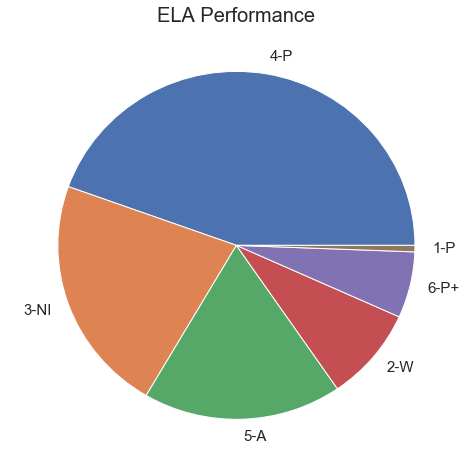

In [44]:
# creating pie chart
plt.title('ELA Performance', size = 20)
ela_scores['Score1Value'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 15)
plt.ylabel('');

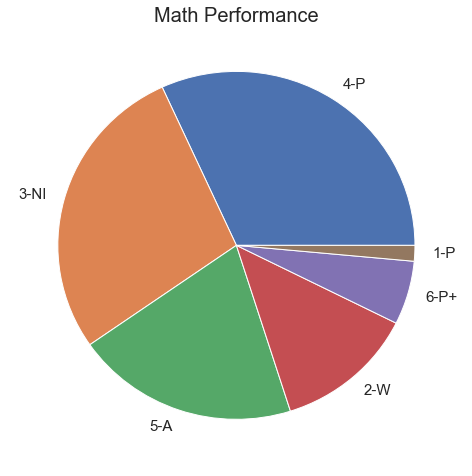

In [45]:
plt.title('Math Performance', size = 20)
math_scores['Score1Value'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 15)
plt.ylabel('');

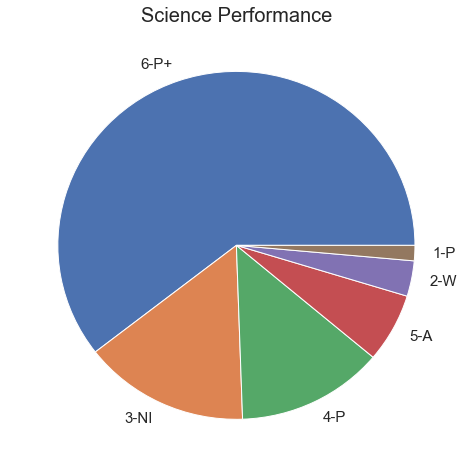

In [46]:
plt.title('Science Performance', size = 20)
sci_scores['Score1Value'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 15)
plt.ylabel('');

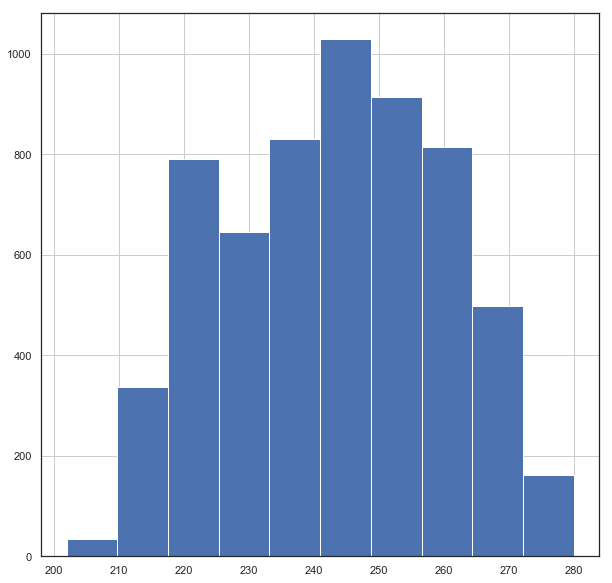

In [47]:
mcas_processed['Score2Value'].hist(figsize = (10,10));

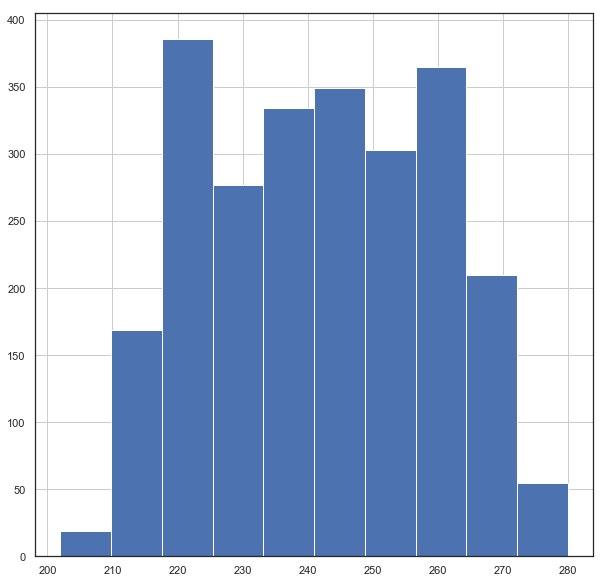

In [48]:
math_scores['Score2Value'].hist(figsize = (10,10));

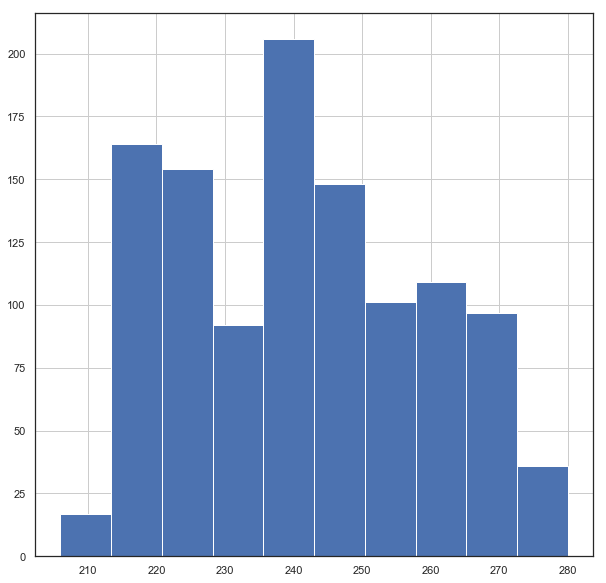

In [49]:
sci_scores['Score2Value'].hist(figsize = (10,10));